<a href="https://colab.research.google.com/github/yajuna/tmath308/blob/master/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This week, we cover systems of linear equations and their direction methods (Sections 2.1 and 2.2).

We cover Sections 2.1 and 2.2; and we will be using the `numpy` library of `Python` to help solve these systems with Google Colab.

## Definition (linear equation)
A linear equation in the $n$ variables $x_1,...,x_n$ is an equation that can be written in the form

$a_1x_1+a_2x_2+...+a_nx_n=b$

where the _coefficients_ $a_1,...,a_n$ and the _constant term_ $b$ are constants.

The equation is linear in the variables $x_1,...,x_n$.

## Definition (solution)

A solution to the above system is a _tuple_ (_vector_) $[s_1,...,s_n]$, such that

$a_1s_1+a_2s_2+...+a_ns_n=b$ is true.

## Definition (system)

A __system__ of linear equations is a finite set of linear equations, each with the _same_
variables. A solution of a system of linear equations is a tuple(vector) that is _simultaneously_
a solution of each equation in the system. The solution set of a system of linear equations is the set of all solutions of the system. We will refer to the process of finding the
solution set of a system of linear equations as "solving the system".


In [10]:
# check out system information and import libraries
import sys
import numpy as np
import sympy as sp
import matplotlib
from matplotlib import pyplot as plt

# understand your software version for reproducibility
print(sys.executable)
print(sys.version_info)
print(np.version.version)
print(sp.__version__)
print(matplotlib.__version__)

/usr/bin/python3
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)
1.23.5
1.12
3.7.1


### We introduce inner product to check if a vector is a solution to a given linear equation.

 __a__$ \cdot$ __x__ $= a_1x_1+a_2x_2+...+a_nx_n$.

 The result of the computation should be a scalar.

 Here we create a vector __a__ and a vector __x__, generated randomly of size _n_. Pay attention to the shape of __a__ and __x__.

In [11]:
n = 7

a = np.random.randint(-5, 5, (1,n))
x = np.random.randint(0, 1e2, (n,1))

print(a)
print(x)

[[-2 -3  4  1 -4 -4  2]]
[[83]
 [42]
 [40]
 [70]
 [43]
 [32]
 [97]]


In [12]:
dot_ax = a.dot(x)
print(dot_ax)

[[-168]]


### The above means

The equation $a_1x_1+a_2x_2+...+a_nx_n =$ dot\_ax has a solution, the randomly generated values stored in __x__.

### A system of equations might have
1. A unique solution (ideal case) --consistent system
2. Infinitely many solutions -- consistent system
2. No solution -- inconsistent system

Systems of two equations with two variables can be geometrically interpreted on the plane. You can plot systems with three variables by plotting planes. See an example [here](https://github.com/yajuna/126jupyternotebooks/blob/master/week5_lines_planes.ipynb).

In [13]:
## define line plotter
"""
hyperparameter: tmin, tmax
input: a_1, a_2, b
output: plot of the line a_1x_1+a_2x_2 = b
"""
tmin = -5
tmax = 7

def plot_line(a1, a2, b):
    t = np.linspace(tmin, tmax, int(1e5))
    if a2 == 0:
      plt.vlines(x = b/a1, ymin = tmin, ymax = tmax,
           colors = 'purple',label=f"{a1}$x_1$={b}")
      plt.legend(loc='upper left',prop = {'size':7},bbox_to_anchor=(1,1))
      plt.xlabel ('$x_1$')
      plt.ylabel ('$x_2$')
    else:
      plt.plot(t, (b - a1 * t)/a2,label=f"{a1}$x_1$+{a2}$x_2$={b}")
      plt.legend(loc='upper left',prop = {'size':7},bbox_to_anchor=(1,1))
      plt.xlabel ('$x_1$')
      plt.xlabel ('$x_2$')

### Plot two lines given coefficients $a_1,\ a_2$ and $b$.

In the following we plot
$2x_1+3x_2 =6$ and $1x_1=3$.

Change the values and play around to find systems with one, infinitely many, and no solution.

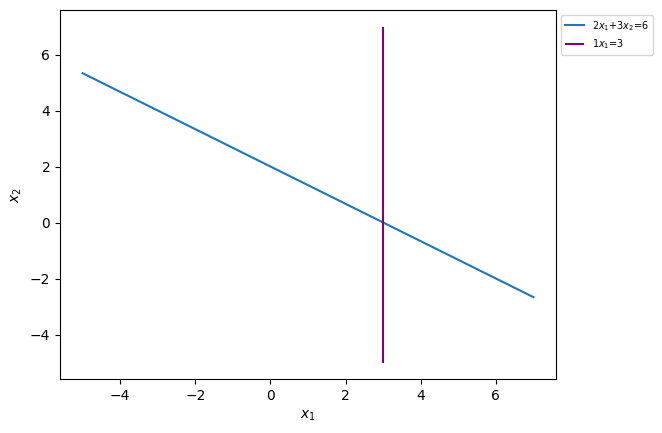

In [14]:
plot_line(2,3,6)
plot_line(1,0,3)

## Definition (equivalence)

Two systems are called equivalent if they have the same solution sets. The systems

$\begin{cases}x-y = 1\\ x+y = 3\end{cases}$ and $\begin{cases}x-y = 1\\ y = 1\end{cases}$ are equivalent.

Think what the plots mean.

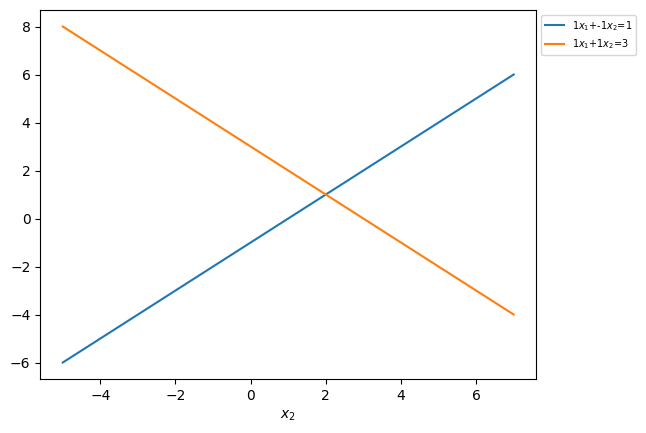

In [15]:
plot_line(1,-1,1)
plot_line(1,1,3)

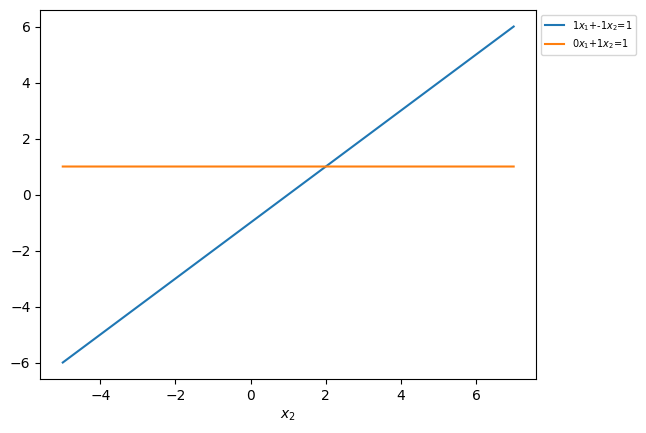

In [16]:
plot_line(1,-1,1)
plot_line(0,1,1)

## A nice way to organize your sytems is to only keep track of the coefficients and the right hand side vector.

The solution (i.e. the tuple of numbers) for
$2x+3y=6$ and $2u+3v=6$ are the same, and we therefore only need the information [2,3,6].

The array of numbers that records the coefficient of the system is an example of a _matrix_. In this case, it is [2,3].

Together with the right hand side, we call the array the _augmented matrix_. In this case it is [2,3,6].

## Example
Consider the system
$\begin{cases}2x+2y+2z=10\\ x+2y+0z=3\\ 2x+y+3z=12\end{cases}$.

The coefficient matrix (denoted by $A$) is
$\begin{pmatrix} 2&2&2\\ 1&2&0 \\ 2&1&3\end{pmatrix}$

and the augmented matrix is (denoted by $[A|\mathbf{b}]$) $\left(\begin{array}{ccc|c}  
2&2&2&10\\ 1&2&0&3 \\ 2&1&3&12
\end{array}\right)$


## The more zeros you have in your coefficients, the easier your system is to solve.

If your system is already in a upper triangular form, then you are direct solve the system via __back substitution__. Otherewise, you can first simplify your syetem with the Echelon form and the reduced Echelon form, and then use back substitution. This is a direct method to solve the system, called _Gaussian Elimination_.

### Definition (Row operations)
The following operations do not change the solution of a system, and we use them to create more zeros:
- Interchange two rows
- Multiply a row by a nonzero constant
- Add a scalar multiple of a row to another row

Row operations are _invertible_: for example, Divide a row by the same nonzero constant, you get the original row.


In [17]:
### REF
Vec = np.array([[2,2,2,10],[1,2,0,3],[2,1,3,12]])

Vec_ref = sp.Matrix(Vec).echelon_form()

print("The Echelon form is\n", Vec_ref)

### RREF
Vec_rref = sp.Matrix(Vec).rref()
print("The reduce Echelon form is\n", Vec_rref)

The Echelon form is
 Matrix([[2, 2, 2, 10], [0, 2, -2, -4], [0, 0, 0, 0]])
The reduce Echelon form is
 (Matrix([
[1, 0,  2,  7],
[0, 1, -1, -2],
[0, 0,  0,  0]]), (0, 1))


Via row operations, we can get our matrices to the following forms:

### Row echelon form:
1. Any rows consisting entirely of zeros are at the bottom.
2. In each nonzero row, the first nonzero entry (called the leading entry) is in a column to the left of any leading entries below it.

Even more zeros:

### Reduced row echelon form:
1. It is in row echelon form.
2. The leading entry in each nonzero row is a 1 (called a leading 1).
3. Each column containing a leading 1 has zeros everywhere else.


### Definition (row equivalence)
Matrices $A$ and $B$ are _row equivalent_ if there is a sequence of elementary row operations that converts $A$ to $B$.


### As all matrices can be reduced to some REF or RREF, two matrices with the same REF or RREF are row equivalent.



## Definition

The rank of a matrix is the number of nonzero rows in its row echelon form.

## The Rank Theorem
Let $A$ be the coefficient matrix of a system of linear equations with $n$ variables. If the system is consistent, then

number of free variables $= n - \text{rank} (A)$.

__Remark__: If a system has at least one free variable, then it will have infinitely many solutions.

## Definition
A system of linear equations is called homogeneous if the constant (right hand side) term in each equation is zero.

_A homogeneous system is always consistent_. (Why?)


## Theorem
If $[A |\mathbf{0}]$ is a homogeneous system of $m$ linear equations with $n$ variables, where $m < n$, then the system has infinitely many solutions.